# Learning to fly a glider
AE598 project

# Introduction

The goal of this project was to recreate Reddy et al. work of teaching a RL agent to fly a glider in the field by taking advantage of thermals. They started their work by formulating the time-invarient problem in a way such that it can be solved using a stationary RL algorithm. The goals for this project was to focus on modeling and simulation aspect of a RL problem, which also included a wind model that simulates the thermals. A simulator with simplified dynamics for the aircraft was created. Major assumptions were that the aircraft's body-fixed frame is an inertial frame as well as constant accelerations. This enables simpler equations of motion as well as simpler discretization and calculation at each time step. 

# Goals
The 2 major goals I have set up for this project were creating a functional simulator that works (aircraft and wind dynamics). And the applying the algorithm to have the agent learn how to fly in that environment. 

## Environment
The agent (SARSA) uses acceliration in the z axis as a reward for it's actions, where gain in altitude is favorable. The states are: rolling moment and bank angle. They are discretized and binned into 3 and 5 bins respectively. 2 figure below are examples of a randomised gust centers. At east environment reset, the gust centers are randomly chosen along with their strength and time constant. The first figure shows a heatmap of the verticle velocity in the xy plane. Note that gust velocity contribution does not chance in the z-axis. The second figure is the same data in a 3D surface plot. 

In [28]:
iter = 0
import time
t0 = time.time()

for i_t in range(t):
    print(i_t,time.time()-t0)    
    for i_x in range(dim):
        for i_y in range(dim):
            iter += 1
            ti = i_t*2
            x =  i_x * chunk 
            y =  i_y * chunk
            if iter % 100 == 0:
                print(x,y,t, iter)
            
            pos = tupler(x , y)
            env.Time = ti
            v[i_t, i_x, i_y] = np.mean(env.get_wind(pos, heading))
print("elapsed time",(time.time()-t0)/60,"minutes")


0 0.0010020732879638672
0 990 1 100
10 990 1 200
20 990 1 300
30 990 1 400
40 990 1 500
50 990 1 600
60 990 1 700
70 990 1 800
80 990 1 900
90 990 1 1000
100 990 1 1100
110 990 1 1200
120 990 1 1300
130 990 1 1400
140 990 1 1500
150 990 1 1600
160 990 1 1700
170 990 1 1800
180 990 1 1900
190 990 1 2000
200 990 1 2100
210 990 1 2200
220 990 1 2300
230 990 1 2400
240 990 1 2500
250 990 1 2600
260 990 1 2700
270 990 1 2800
280 990 1 2900
290 990 1 3000
300 990 1 3100
310 990 1 3200
320 990 1 3300
330 990 1 3400
340 990 1 3500
350 990 1 3600
360 990 1 3700
370 990 1 3800
380 990 1 3900
390 990 1 4000
400 990 1 4100
410 990 1 4200
420 990 1 4300
430 990 1 4400
440 990 1 4500
450 990 1 4600
460 990 1 4700
470 990 1 4800
480 990 1 4900
490 990 1 5000
500 990 1 5100
510 990 1 5200
520 990 1 5300
530 990 1 5400
540 990 1 5500
550 990 1 5600
560 990 1 5700
570 990 1 5800
580 990 1 5900
590 990 1 6000
600 990 1 6100
610 990 1 6200
620 990 1 6300
630 990 1 6400
640 990 1 6500
650 990 1 6600
660 99

In [27]:
import abdulgym
import numpy as np
env = abdulgym.make('Gliderbot-v0') 
env.reset()
from collections import namedtuple
import matplotlib.pyplot as plt
tupler = namedtuple("a", ['x','y'])
t= 1
delta = 1 # how many data points per meter of each direction
chunk = 10
dim = env.max_x*delta // chunk
v = np.zeros([t, dim, dim])
heading = 0

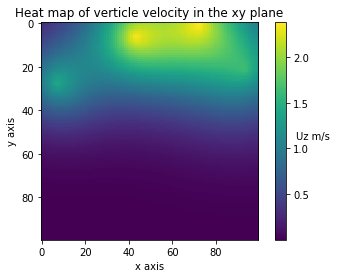

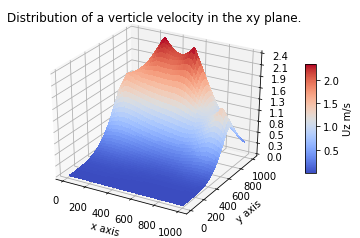

In [52]:
#     env.step() <-- return digit_state, self.state , reward, [w_left, w_right]
plt.imshow(v[0])
plt.title('Heat map of verticle velocity in the xy plane')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.colorbar().set_label('Uz m/s', rotation=0)
plt.show()
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
import matplotlib.animation as animation


fig = plt.figure()

ax = fig.gca(projection='3d')

# Make data.
X = np.arange(1000, 0, -10)
Y = np.arange(1000, 0, -10)
X, Y = np.meshgrid(X, Y)
Z = v[0]

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.01f'))

fig.colorbar(surf, shrink=0.5, aspect=10).set_label('Uz m/s')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('Distribution of a verticle velocity in the xy plane.')
plt.show()

# Results
Below is a figure showing the flight path of the glider for a random policy compared to a couple of learned policies. 

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import random
from random import random
import abdulgym 
from SARSA import SARSAsimagent

epsilon= 0.1
alpha= 0.1
gamma= 1.0
ep_len= 100
ep_num= 300
meta=[epsilon,alpha,gamma,ep_len, ep_num]

In [8]:
import time
t0=time.time()
env = abdulgym.make('Gliderbot-v0') 
env.reset()
Q, reward, a, s, r_s, big_state = SARSAsimagent(meta,env)
# troubleshooting block
tf = time.time()-t0


In [23]:
envr = abdulgym.make("Gliderbot-v0")
envr.reset()
big_state_r =[]
xr , yr, zr,x,y,z = [],[],[],[],[],[]
action_list = []
samples_num = ep_len*ep_num # total number of samples taken 
for i in range(ep_len):
    action = np.random.randint(0,3)
    envr.step(action)
    state = envr.state
    big_state_r.append(state)
    xr.append(state.pos.x)
    yr.append(state.pos.y)
    zr.append(state.pos.z)
    action_list.append(action)





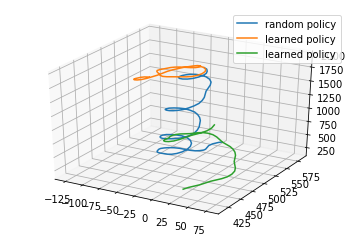

In [26]:

for v in big_state:
    x.append(v.pos.x)
    y.append(v.pos.y)
    z.append(v.pos.z)
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(xr, yr, zr, label='random policy')
ax.plot(x[:100:],y[:100:],z[:100:],label='learned policy')
ax.plot(x[-100:-1:],y[-100:-1:],z[-100:-1:],label='learned policy')

ax.legend()

plt.show()

In [86]:
ga=[] #greedy action for sarsa

for i in range(15):
    ga.append(np.argmax(Q[:,i]))

soutput=15*['']
for i in range(len(ga)):
    if ga[i]==0:
        soutput[i]='-'
    elif ga[i]==1:
        soutput[i]='<'
    elif ga[i]==2:
        soutput[i]='>'
    else:
        soutput[i]='v'
    
print('  SARSA Greedy Policy')
print('',*soutput[10:15],' w > 0 \n',*soutput[5:10],' w = 0 \n',*soutput[0:5],' w < 0 \n')
# 0 right 1 left 2 up 3 down
print('')

  SARSA Greedy Policy
 > - > > -  w > 0 
 - > > - <  w = 0 
 > < > > -  w < 0 




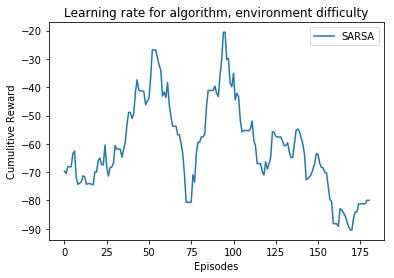

In [81]:
N=20
plt.plot(np.convolve(reward, np.ones((N,))/N, mode='valid'))
plt.xlabel('Episodes')
plt.title('Learning rate for algorithm, environment difficulty')
plt.ylabel('Cumulitive Reward')
plt.legend(['SARSA'])
plt.show()

# Conclusion and moving forward
I strongly believe that the way the reward or state is formulated, shows that it's not learning. Because it's showing that the loss in height is actually a little less when compared to the totally random policy, on average. So I think playing around with different state/reward combination might help the agent detect the positive trend more easily. This is mainly due to the aircraft being in a constant deceleration in the z-axis, due to gravity, and even when gust increases acceleration, the agent still gets a negative reward even thought the acceleration is less negative which is an improvement. I tried different ways to do that but I still could not make it learn.<br>
It's was quite the challenge building this simulator. Way more than I had anticipated from a time-consumption, effort and detail. But I am glad I embaraked on this challenge given simulation building is a big part of problem solving in this space that I have not had the chance to delve into. 

## Wins
This semester's journey as whole was extremely fulfilling and enriching academically. I think it's safe to claim that I have learned in this semester more than any in the past due to a combination of flexible work schedule, more flexibility in working within my knowledge boundaries and background as well as a varies pace throughout the semester. <br>
I started this semester with no knowledge whatsoever in Object Oriented Programming, Python or RL. And here I am building my own environment and using my RL algorithm that I wrote from scratch. I concluded this semester with a decent competency in all of these subjects as well as the ability to continue to teach myself what i do not know. I am not excagerating when I say this is the most useful class I have taken in grad school. Thank you to both of you Dr Bretl and Dr West.  